In [1]:
#!pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl

In [2]:
#한글 형태소 분류기
#!pip install konlpy

In [3]:
from konlpy.tag import Okt,Kkma

In [4]:
okt=Okt()
kkma=Kkma()

In [5]:
okt.morphs('아버지가방에들어가신다')

['아버지', '가방', '에', '들어가신다']

In [6]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [7]:
kkma.morphs('아버지가방에들어가신다')

['아버지', '가방', '에', '들어가', '시', 'ㄴ다']

In [8]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [ ]:
#기존방법
#BOW(countVaxctorizer)를 사용해서 글자의 빈도를 세어서 사용
#띄어쓰기를 기준으로 글자를 나눴다

In [ ]:
#기존방법 + konlpy(한글 형태소 분류기)
#BOW(countVaxctorizer)를 사용해서 글자의 빈도를 세어서 사용
#konlpy를 기준으로 글자를 나눈다

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

In [11]:
text = [
    '수고했어요~ 날 추우니까 다들 따뜻하게 입고다니고 집에 조심히들 가요~',
    '그리고 지각 그만해요 이번주 지각 자들은 목요일에 나랑 이야기할꺼니까~',
    '다들 종례 시트 확인하시고 당번들은 잘진행하세용~'    
]

In [10]:
textBow=CountVectorizer()
okt=Okt()

In [12]:
textBow.fit(text)

CountVectorizer()

In [13]:
#Bow만 사용해서 단어사전 구축하기
textBow.vocabulary_

{'수고했어요': 8,
 '추우니까': 19,
 '다들': 4,
 '따뜻하게': 6,
 '입고다니고': 12,
 '집에': 18,
 '조심히들': 15,
 '가요': 0,
 '그리고': 1,
 '지각': 17,
 '그만해요': 2,
 '이번주': 10,
 '자들은': 13,
 '목요일에': 7,
 '나랑': 3,
 '이야기할꺼니까': 11,
 '종례': 16,
 '시트': 9,
 '확인하시고': 20,
 '당번들은': 5,
 '잘진행하세용': 14}

In [17]:
#okt로 형태소 분류하기
def myTokenizer(text):
    #모든 형태소 구분하기
    #return okt.morphs(text)
    #명사만 추출하기
    return okt.nouns(text)

#okt+bow
test_bow_okt=CountVectorizer(tokenizer=myTokenizer)

In [18]:
test_bow_okt.fit(text)
#okt + bow 의 단어사전
test_bow_okt.vocabulary_

C:\Users\smhrd\anaconda3\envs\konlpy\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'수고': 6,
 '날': 2,
 '집': 16,
 '조심': 11,
 '가요': 0,
 '지각': 14,
 '이번': 8,
 '주': 13,
 '자': 10,
 '목요일': 4,
 '나': 1,
 '이야기': 9,
 '종례': 12,
 '시트': 7,
 '확인': 17,
 '당번': 3,
 '진행': 15,
 '세용': 5}

# 1.문제정의
- 네이버 영화리뷰 데이터셋
- 긍정과 부정을 구분하기
- 긍정/부정을 판단하는데 많은 영향을 끼치는 단어 시각화
- Bow 말고 다른 토큰화 방법 사용해보기

# 2.데이터수집

In [20]:
import pandas as pd
import numpy as np

In [64]:
text_train=pd.read_csv('./ratings_train.txt',delimiter='\t')
text_test=pd.read_csv('./ratings_test.txt',delimiter='\t')

In [65]:
text_train.shape, text_test.shape

((150000, 3), (50000, 3))

# 3.데이터 전처리

In [66]:
text_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [67]:
text_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [25]:
#train > 5개의 결측치 제거
#test > 3개의 결측치 제거
text_train.dropna(inplace=True)
text_test.dropna(inplace=True)

In [68]:
#추가적인 전처리를 진행한다고 하면
#정규표현식을 사용해서 한글만 남기기
text_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [27]:
X_train = text_train['document'][:10000]
y_train=text_train['label'][:10000]
X_test=text_test['document'][:2000]
y_test=text_test['label'][:2000]

In [28]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((10000,), (10000,), (2000,), (2000,))

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Kkma 

In [34]:
def myTokenizer(text):
    return Kkma().nouns(text)

In [35]:
bow_kkma=CountVectorizer(tokenizer=myTokenizer)
bow_kkma.fit(X_train) #단어사전 구축

CountVectorizer(tokenizer=<function myTokenizer at 0x000002AFB8CD5A60>)

In [36]:
X_train=bow_kkma.transform(X_train)
X_test=bow_kkma.transform(X_test)

In [37]:
len(bow_kkma.vocabulary_)

14923

In [42]:
X_train

<10000x14923 sparse matrix of type '<class 'numpy.int64'>'
	with 68042 stored elements in Compressed Sparse Row format>

In [ ]:
#BOW 방법론에서는 가장 빈도가 높은 단어가 가장 중요하다고 판단
#TFIDF 방법론
#1.많이 나왔는가 > 각 문서에서 발생한 빈도
#2.문서에서 단어가 발생한 빈도 > 전체 문서 중에서 해당 단어가 들어가 있는 문서의 수 
#                                > 역수를 사용 > 적은 문서에서 발견될수록 가치있는 정보다
#3.1번 값과 2번 값을 곱해서 큰 수가 나올수록 중요한 단어

In [43]:
# TFIDF 토큰화 사용하기
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(tokenizer=myTokenizer)
X_train = text_train['document'][:10000]
X_test=text_test['document'][:2000]

In [44]:
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

C:\Users\smhrd\anaconda3\envs\konlpy\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# 4.탐색적 데이터 분석
- 생략

# 5.모델 선택 및 하이퍼파라미터 튜닝

In [38]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
#bow + kkma
lr.score(X_train,y_train)

0.8979

In [41]:
#bow + kkma
lr.score(X_test,y_test)

0.7335

In [48]:
# tfidf + kkma
#결과가 다소 안좋아짐
#리뷰데이터는 하나의 문서가 하나의 리뷰 > 문서 자체의 데이터가 크지않아서 의미가 다소 떨어짐
lr.score(X_train,y_train)

0.8556

In [49]:
#tfidf + kkma
lr.score(X_test,y_test)

0.725

In [ ]:
#pipeline으로 tfidf + kkma + LogisticRegression

In [50]:
from sklearn.pipeline import make_pipeline

In [69]:
pipe_model=make_pipeline(
    TfidfVectorizer(tokenizer=myTokenizer),
    LogisticRegression()
)
text_train=text_train['document'][:10000]
text_test=text_test['document'][:2000]

pipe_model.fit(text_train,y_train)

C:\Users\smhrd\anaconda3\envs\konlpy\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(tokenizer=<function myTokenizer at 0x000002AFB8CD5A60>)),
                ('logisticregression', LogisticRegression())])

In [80]:
pipe_model.predict(['영화보고하품이나오네요'])

array([0], dtype=int64)

In [73]:
text_train

0                                     아 더빙.. 진짜 짜증나네요 목소리
1                       흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                       너무재밓었다그래서보는것을추천한다
3                           교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4       사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                              ...                        
9995    곰티비로 무료로 봤기때문에 5점주려고했는데 1 한국 공포영화의 특징인 깜놀시키려 하...
9996    이딴걸드라마라고썼냐 수습할수없으면걍친자녀아니면되고 간단하네 얼굴을바꿨으면 결말이라도...
9997                                왠지 김연아 크면 에리카처럼 될것같음.
9998            솔직히 굿 ㅋㅋㅋㅋ 넘버11씨는 살아남길 바랬는데 2번째극장판 어서 나오길
9999                                        그냥보다나옴 노답 핵노잼
Name: document, Length: 10000, dtype: object

In [74]:
y_train

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: label, Length: 10000, dtype: int64

In [81]:
pipe_model.steps

[('tfidfvectorizer',
  TfidfVectorizer(tokenizer=<function myTokenizer at 0x000002AFB8CD5A60>)),
 ('logisticregression', LogisticRegression())]

In [84]:
tfidf=pipe_model.steps[0][1]
logi=pipe_model.steps[1][1]

In [89]:
voca=tfidf.vocabulary_
df=pd.DataFrame([voca.keys(),voca.values()])
#데이터프레임 가로 세로 변경
df=df.T
#1번 열(단어사전에 등록된 단어의 번호) 기준으로 정렬
df_sorted=df.sort_values(by=1)
df_sorted['weight']=logi.coef_[0]
df_sorted.head()

,0,1,weight
10394,-10,0,-0.200664
9040,-1000000000,1,-0.153062
13876,-10점,2,-0.089091
6594,-120,3,-0.245164
329,-2,4,0.080152


In [91]:
#가중치 기준으로 정렬하기
df_sorted.sort_values(by='weight',inplace=True)
df_sorted.head()

,0,1,weight
516,최악,12687,-4.521554
205,쓰레기,8069,-4.143350
477,실망,7922,-3.697868
266,돈,3576,-3.306030
446,유치,9990,-2.931222


In [92]:
df_sorted.tail()

,0,1,weight
961,감동적,1060,2.870650
694,여운,8862,2.896695
180,수작,7382,3.047286
348,가슴,919,3.273861
217,최고,12641,5.420388


In [93]:
#긍정/부정의 top20으로 dataframe 생성하기
top20_df=pd.concat([df_sorted.head(20),df_sorted.tail(20)])
top20_df

,0,1,weight
516,최악,12687,-4.521554
205,쓰레기,8069,-4.143350
477,실망,7922,-3.697868
266,돈,3576,-3.306030
446,유치,9990,-2.931222
487,뭐,5078,-2.635933
620,이것,10162,-2.536037
385,짜증,12281,-2.530713
460,졸작,11720,-2.526076
746,어이,8610,-2.382379


In [98]:
# 한글폰트 적용하기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font',family=font_name)

# -기호 표시하기
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [97]:
import matplotlib.pyplot as plt

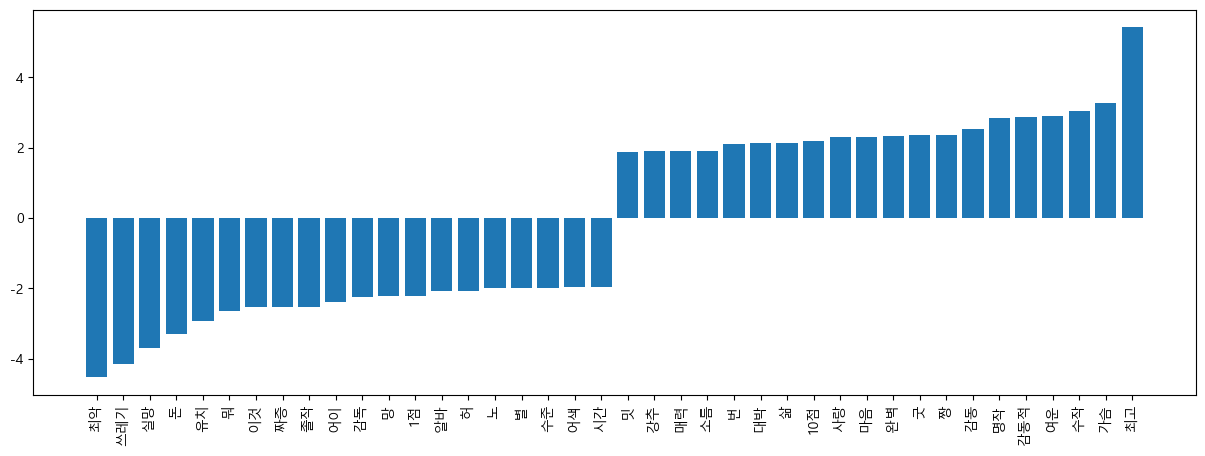

In [99]:
plt.figure(figsize=(15,5))
plt.bar(top20_df[0],top20_df['weight'])
plt.xticks(rotation=90)
plt.show()